In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Or, impute missing values with mean (for numerical columns)
data.fillna(data.mean(), inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Split data into training and testing sets
X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

<ipython-input-4-3b3069ebbbdf>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
'''
Feature Selection:
© Select the relevant features that you believe will influence the selling
price of a used car. Justify your feature selection choices.
'''

selected_features = [
    "1. Year: Newer cars generally command higher prices due to perceived better condition.",
    "2. Kilometers Driven (km_driven): Lower mileage cars are more valuable due to less wear and tear.",
    "3. Fuel: Type of fuel (e.g., petrol, diesel) influences operating costs and price.",
    "4. Seller Type: Dealers may offer certified cars at higher prices than individual sellers.",
    "5. Transmission: Automatic transmissions are priced higher for their convenience.",
    "6. Owner: First-owner cars are more expensive due to better condition.",
    "7. Mileage: Better fuel efficiency leads to higher selling prices.",
    "8. Engine: Engine size (CC) affects performance, potentially impacting the price.",
    "9. Max Power: Higher power output (bhp) can raise the selling price.",
    "10. Torque: Torque (Nm) influences performance and may impact pricing.",
    "11. Seats: More seating capacity may result in higher selling prices."
]

for feature in selected_features:
    print(feature)


1. Year: Newer cars generally command higher prices due to perceived better condition.
2. Kilometers Driven (km_driven): Lower mileage cars are more valuable due to less wear and tear.
3. Fuel: Type of fuel (e.g., petrol, diesel) influences operating costs and price.
4. Seller Type: Dealers may offer certified cars at higher prices than individual sellers.
5. Transmission: Automatic transmissions are priced higher for their convenience.
6. Owner: First-owner cars are more expensive due to better condition.
7. Mileage: Better fuel efficiency leads to higher selling prices.
8. Engine: Engine size (CC) affects performance, potentially impacting the price.
9. Max Power: Higher power output (bhp) can raise the selling price.
10. Torque: Torque (Nm) influences performance and may impact pricing.
11. Seats: More seating capacity may result in higher selling prices.


In [ ]:
# Linear Regression Model:
print("'year' and 'km_driven' predicting 'selling_price'")

# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'year' and 'km_driven' predicting 'selling_price'
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a Linear Regression model
model1 = LinearRegression()

# Train the Linear Regression model using the training data
model1.fit(X1_train, y1_train)

# You can now use the trained model to make predictions on the test data
y1_pred = model1.predict(X1_test)


'year' and 'km_driven' predicting 'selling_price'


Enter the car's year: 2014
Enter the kilometers driven: 68000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price (Scenario 1): ₹655061.79


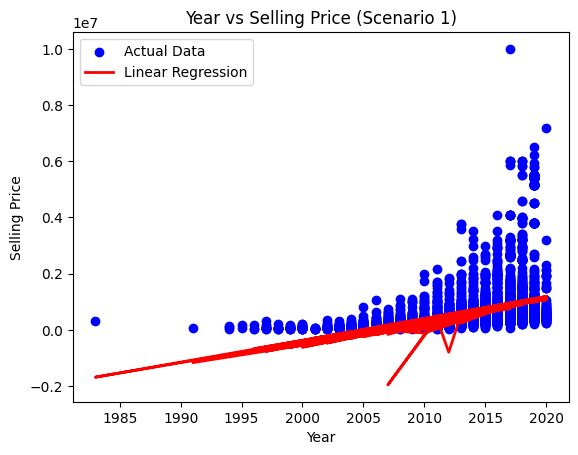

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Create Linear Regression model for Scenario 1
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']
model1 = LinearRegression()
model1.fit(X1, y1)

# Function to predict selling price based on user input
def predict_selling_price_1(year, km_driven):
    return model1.predict([[year, km_driven]])[0]

# User input for Scenario 1
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price_1 = predict_selling_price_1(year_input, km_input)
print(f"Predicted Selling Price (Scenario 1): \u20B9{predicted_price_1:.2f}")


# Plotting the predicted prices for Scenario 1
plt.scatter(data['year'], data['selling_price'], color='blue', label='Actual Data')
plt.plot(data['year'], model1.predict(X1), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Scenario 1)')
plt.legend()
plt.show()


Enter the car's year: 2017
Enter the kilometers driven: 50000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price (Scenario 1): ₹903140.79


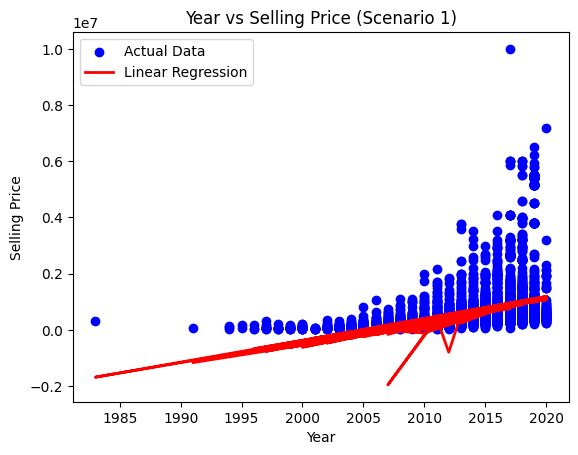

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Create Linear Regression model for Scenario 1
X1 = data[['year', 'km_driven']]
y1 = data['selling_price']
model1 = LinearRegression()
model1.fit(X1, y1)

# Function to predict selling price based on user input
def predict_selling_price_1(year, km_driven):
    return model1.predict([[year, km_driven]])[0]

# User input for Scenario 1
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price_1 = predict_selling_price_1(year_input, km_input)
print(f"Predicted Selling Price (Scenario 1): \u20B9{predicted_price_1:.2f}")

# Plotting the predicted prices for Scenario 1
plt.scatter(data['year'], data['selling_price'], color='blue', label='Actual Data')
plt.plot(data['year'], model1.predict(X1), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Scenario 1)')
plt.legend()
plt.show()


Enter the car's year: 2014
Enter the kilometers driven: 69000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Selling Price: ₹655178.93


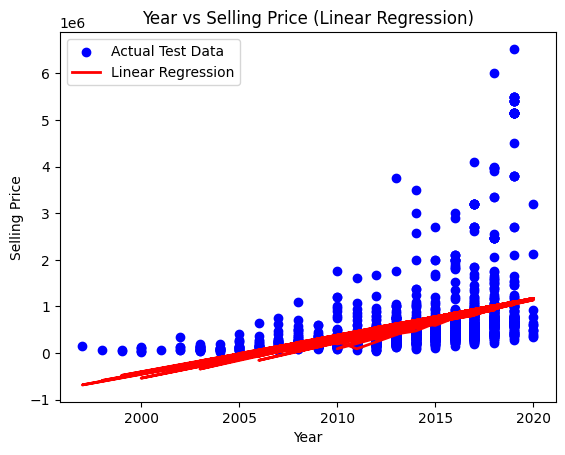

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Split the dataset into training and testing sets (80% training, 20% testing)
X = data[['year', 'km_driven']]
y = data['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(year, km_driven):
    return model.predict([[year, km_driven]])[0]

# User input
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))

predicted_price = predict_selling_price(year_input, km_input)
print(f"Predicted Selling Price: \u20B9{predicted_price:.2f}")

# Plotting the predicted prices
plt.scatter(X_test['year'], y_test, color='blue', label='Actual Test Data')
plt.plot(X_test['year'], model.predict(X_test), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price (Linear Regression)')
plt.legend()
plt.show()


In [ ]:
print("The above is complete Linear Regression Model with 80% training and 20% testing")

The above is complete Linear Regression Model with 80% training and 20% testing


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Selecting relevant features for the model
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = data[features]
y = data['selling_price']

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the Linear Regression model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(features_input):
    return model.predict([features_input])[0]

# User input for car features
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))
mileage_input = float(input("Enter the car's mileage: "))
engine_input = float(input("Enter the engine size (CC): "))
max_power_input = float(input("Enter the max power (bhp): "))
torque_input = float(input("Enter the torque (Nm): "))
seats_input = int(input("Enter the number of seats: "))

# Predict selling price based on user input
user_features = [year_input, km_input, mileage_input, engine_input, max_power_input, torque_input, seats_input]
predicted_price = predict_selling_price(user_features)
if (predicted_price <= 0):
  predicted_price = predicted_price * -1;
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")
else:
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")



Enter the car's year: 2000
Enter the kilometers driven: 80000
Enter the car's mileage: 20.9
Enter the engine size (CC): 1895
Enter the max power (bhp): 23
Enter the torque (Nm): 200
Enter the number of seats: 5
Predicted Selling Price: ₹805780.19


Enter the car's year: 2000
Enter the kilometers driven: 200000
Enter the car's mileage: 9
Enter the engine size (CC): 5289
Enter the max power (bhp): 12
Enter the torque (Nm): 200
Enter the number of seats: 5
Predicted Selling Price: ₹896442.91


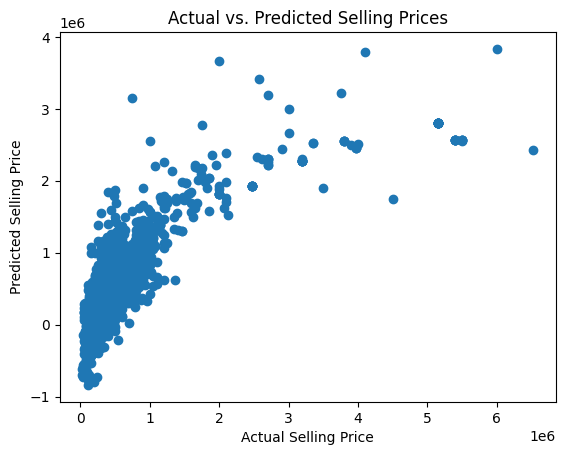

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Selecting relevant features for the model
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = data[features]
y = data['selling_price']

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the Linear Regression model using the training data
model.fit(X_train, y_train)

# Function to predict selling price based on user input
def predict_selling_price(features_input):
    return model.predict([features_input])[0]

# User input for car features
year_input = int(input("Enter the car's year: "))
km_input = int(input("Enter the kilometers driven: "))
mileage_input = float(input("Enter the car's mileage: "))
engine_input = float(input("Enter the engine size (CC): "))
max_power_input = float(input("Enter the max power (bhp): "))
torque_input = float(input("Enter the torque (Nm): "))
seats_input = int(input("Enter the number of seats: "))

# Predict selling price based on user input
user_features = [year_input, km_input, mileage_input, engine_input, max_power_input, torque_input, seats_input]
predicted_price = predict_selling_price(user_features)
if (predicted_price <= 0):
  predicted_price = predicted_price * -1;
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")
else:
  print(f"Predicted Selling Price: ₹{predicted_price:.2f}")

# Plot a scatter plot of predicted vs. actual selling prices from the test set
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

class CarPricePredictor:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.model = None

    def extract_numeric(self, text):
        if isinstance(text, str):
            try:
                numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
                return numeric_value
            except (ValueError, IndexError):
                pass
        return None

    def preprocess_data(self):
        self.data['mileage'] = self.data['mileage'].apply(self.extract_numeric)
        self.data['engine'] = self.data['engine'].apply(self.extract_numeric)
        self.data['max_power'] = self.data['max_power'].apply(self.extract_numeric)
        self.data['torque'] = self.data['torque'].apply(self.extract_numeric)

        features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
        X = self.data[features]
        y = self.data['selling_price']

        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_test)
        self.evaluate_model(y_test, y_pred)

    def evaluate_model(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)

        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"R-squared (R2) Score: {r2:.2f}")

    def predict_price(self, input_features):
        if self.model is None:
            print("Model not trained. Please preprocess data and train the model.")
            return None
        return self.model.predict([input_features])[0]

# Usage example
if __name__ == "__main__":
    car_price_predictor = CarPricePredictor('/content/drive/MyDrive/timepass/Car details v3.csv')
    car_price_predictor.preprocess_data()

    # User input for car features
    year_input = int(input("Enter the car's year: "))
    km_input = int(input("Enter the kilometers driven: "))
    mileage_input = float(input("Enter the car's mileage: "))
    engine_input = float(input("Enter the engine size (CC): "))
    max_power_input = float(input("Enter the max power (bhp): "))
    torque_input = float(input("Enter the torque (Nm): "))
    seats_input = int(input("Enter the number of seats: "))

    user_features = [year_input, km_input, mileage_input, engine_input, max_power_input, torque_input, seats_input]
    predicted_price = car_price_predictor.predict_price(user_features)

    if predicted_price is not None:
        if predicted_price <= 0:
            predicted_price = predicted_price * -1
        print(f"Predicted Selling Price: ₹{predicted_price:.2f}")


Mean Absolute Error (MAE): 276423.37
Root Mean Squared Error (RMSE): 478151.85
R-squared (R2) Score: 0.65
Enter the car's year: 2000
Enter the kilometers driven: 96325
Enter the car's mileage: 23
Enter the engine size (CC): 2589
Enter the max power (bhp): 12
Enter the torque (Nm): 36
Enter the number of seats: 8
Predicted Selling Price: ₹1299714.21


Mean Absolute Error (MAE): 276423.37
Root Mean Squared Error (RMSE): 478151.85
R-squared (R2) Score: 0.65


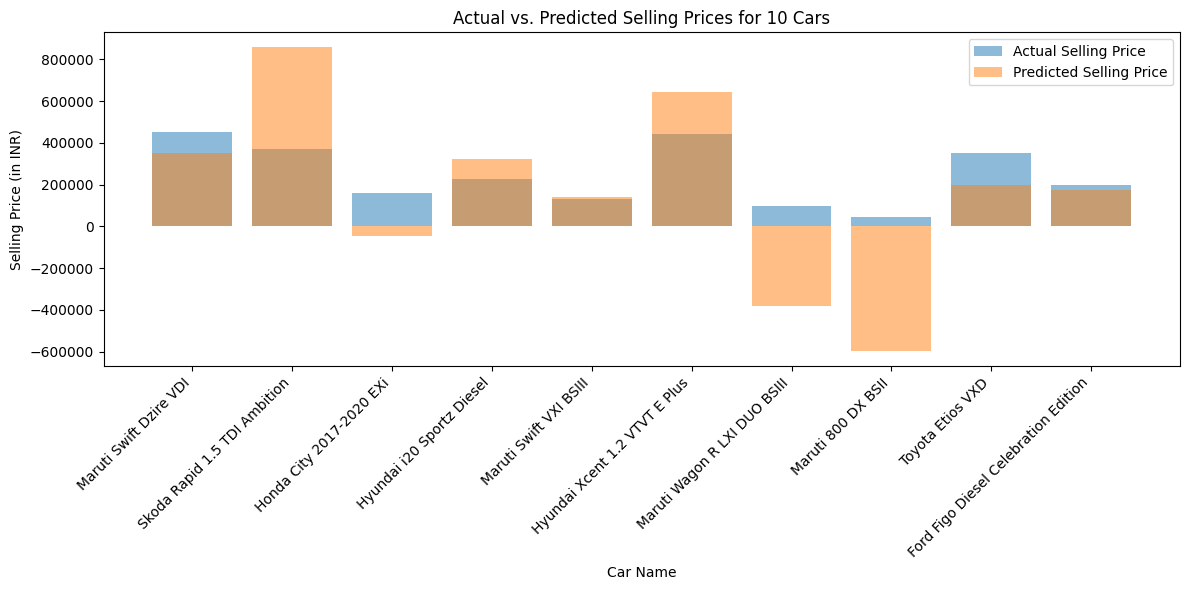

In [5]:
# Create a CarPricePredictor instance and preprocess the data (assuming the class is defined as shown earlier)
car_price_predictor = CarPricePredictor('/content/drive/MyDrive/timepass/Car details v3.csv')
car_price_predictor.preprocess_data()

# Data for the 10 cars you provided
car_data = [
    {
        'name': 'Maruti Swift Dzire VDI',
        'year': 2014,
        'km_driven': 145500,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.4 kmpl',
        'engine': '1248 CC',
        'max_power': '74 bhp',
        'torque': '190Nm@ 2000rpm',
        'seats': 5
    },
    {
        'name': 'Skoda Rapid 1.5 TDI Ambition',
        'year': 2014,
        'km_driven': 120000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Second Owner',
        'mileage': '21.14 kmpl',
        'engine': '1498 CC',
        'max_power': '103.52 bhp',
        'torque': '250Nm@ 1500-2500rpm',
        'seats': 5
    },
    {
        'name': 'Honda City 2017-2020 EXi',
        'year': 2006,
        'km_driven': 140000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Third Owner',
        'mileage': '17.7 kmpl',
        'engine': '1497 CC',
        'max_power': '78 bhp',
        'torque': '12.7@ 2,700(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Hyundai i20 Sportz Diesel',
        'year': 2010,
        'km_driven': 127000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.0 kmpl',
        'engine': '1396 CC',
        'max_power': '90 bhp',
        'torque': '22.4 kgm at 1750-2750rpm',
        'seats': 5
    },
    {
        'name': 'Maruti Swift VXI BSIII',
        'year': 2007,
        'km_driven': 120000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '16.1 kmpl',
        'engine': '1298 CC',
        'max_power': '88.2 bhp',
        'torque': '11.5@ 4,500(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Hyundai Xcent 1.2 VTVT E Plus',
        'year': 2017,
        'km_driven': 45000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '20.14 kmpl',
        'engine': '1197 CC',
        'max_power': '81.86 bhp',
        'torque': '113.75nm@ 4000rpm',
        'seats': 5
    },
    {
        'name': 'Maruti Wagon R LXI DUO BSIII',
        'year': 2007,
        'km_driven': 175000,
        'fuel': 'LPG',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '17.3 km/kg',
        'engine': '1061 CC',
        'max_power': '57.5 bhp',
        'torque': '7.8@ 4,500(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Maruti 800 DX BSII',
        'year': 2001,
        'km_driven': 5000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Second Owner',
        'mileage': '16.1 kmpl',
        'engine': '796 CC',
        'max_power': '37 bhp',
        'torque': '59Nm@ 2500rpm',
        'seats': 4
    },
    {
        'name': 'Toyota Etios VXD',
        'year': 2011,
        'km_driven': 90000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.59 kmpl',
        'engine': '1364 CC',
        'max_power': '67.1 bhp',
        'torque': '170Nm@ 1800-2400rpm',
        'seats': 5
    },
    {
        'name': 'Ford Figo Diesel Celebration Edition',
        'year': 2013,
        'km_driven': 169000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '20.0 kmpl',
        'engine': '1399 CC',
        'max_power': '68.1 bhp',
        'torque': '160Nm@ 2000rpm',
        'seats': 5
    }
]

# Predict selling prices for the provided car data
predicted_prices = []
for car in car_data:
    features_input = [
        car['year'], car['km_driven'], car_price_predictor.extract_numeric(car['mileage']),
        car_price_predictor.extract_numeric(car['engine']), car_price_predictor.extract_numeric(car['max_power']),
        car_price_predictor.extract_numeric(car['torque']), car['seats']
    ]
    predicted_price = car_price_predictor.predict_price(features_input)
    predicted_prices.append(predicted_price)

# Extract actual selling prices from the provided data
actual_prices = [450000, 370000, 158000, 225000, 130000, 440000, 96000, 45000, 350000, 200000]

# Create a bar chart to visualize the predicted vs. actual selling prices
plt.figure(figsize=(12, 6))
plt.bar(range(len(car_data)), actual_prices, label='Actual Selling Price', alpha=0.5)
plt.bar(range(len(car_data)), predicted_prices, label='Predicted Selling Price', alpha=0.5)
plt.xticks(range(len(car_data)), [car['name'] for car in car_data], rotation=45, ha='right')
plt.xlabel('Car Name')
plt.ylabel('Selling Price (in INR)')
plt.title('Actual vs. Predicted Selling Prices for 10 Cars')
plt.legend()
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 276423.37
Root Mean Squared Error (RMSE): 478151.85
R-squared (R2) Score: 0.65


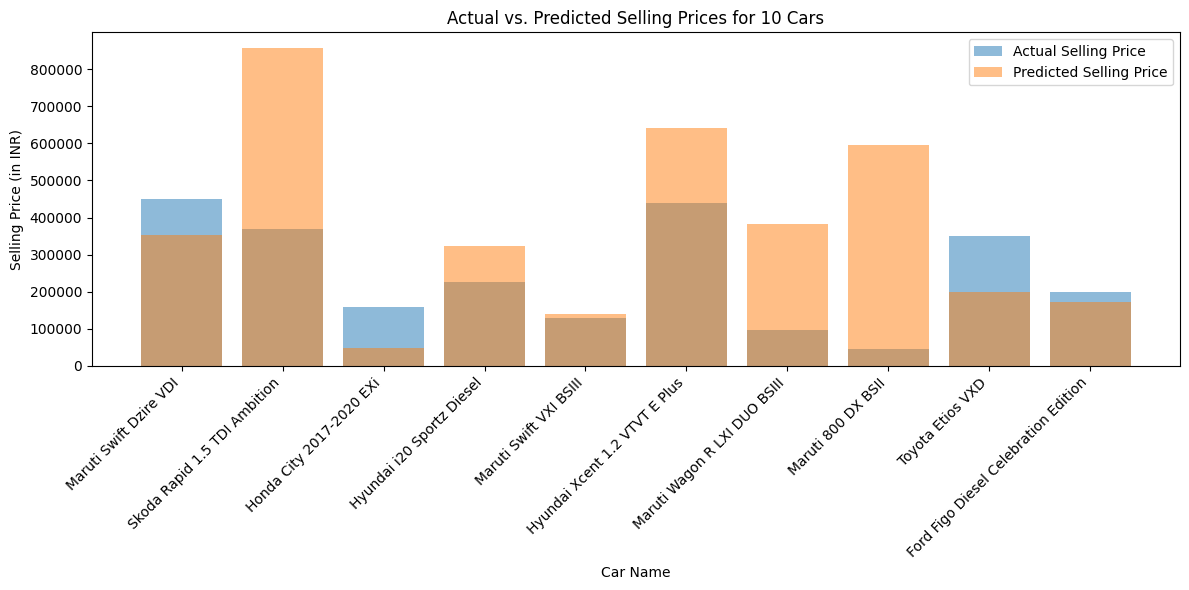

In [6]:
# Create a CarPricePredictor instance and preprocess the data (assuming the class is defined as shown earlier)
car_price_predictor = CarPricePredictor('/content/drive/MyDrive/timepass/Car details v3.csv')
car_price_predictor.preprocess_data()

# Data for the 10 cars you provided
car_data = [
    {
        'name': 'Maruti Swift Dzire VDI',
        'year': 2014,
        'km_driven': 145500,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.4 kmpl',
        'engine': '1248 CC',
        'max_power': '74 bhp',
        'torque': '190Nm@ 2000rpm',
        'seats': 5
    },
    {
        'name': 'Skoda Rapid 1.5 TDI Ambition',
        'year': 2014,
        'km_driven': 120000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Second Owner',
        'mileage': '21.14 kmpl',
        'engine': '1498 CC',
        'max_power': '103.52 bhp',
        'torque': '250Nm@ 1500-2500rpm',
        'seats': 5
    },
    {
        'name': 'Honda City 2017-2020 EXi',
        'year': 2006,
        'km_driven': 140000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Third Owner',
        'mileage': '17.7 kmpl',
        'engine': '1497 CC',
        'max_power': '78 bhp',
        'torque': '12.7@ 2,700(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Hyundai i20 Sportz Diesel',
        'year': 2010,
        'km_driven': 127000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.0 kmpl',
        'engine': '1396 CC',
        'max_power': '90 bhp',
        'torque': '22.4 kgm at 1750-2750rpm',
        'seats': 5
    },
    {
        'name': 'Maruti Swift VXI BSIII',
        'year': 2007,
        'km_driven': 120000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '16.1 kmpl',
        'engine': '1298 CC',
        'max_power': '88.2 bhp',
        'torque': '11.5@ 4,500(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Hyundai Xcent 1.2 VTVT E Plus',
        'year': 2017,
        'km_driven': 45000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '20.14 kmpl',
        'engine': '1197 CC',
        'max_power': '81.86 bhp',
        'torque': '113.75nm@ 4000rpm',
        'seats': 5
    },
    {
        'name': 'Maruti Wagon R LXI DUO BSIII',
        'year': 2007,
        'km_driven': 175000,
        'fuel': 'LPG',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '17.3 km/kg',
        'engine': '1061 CC',
        'max_power': '57.5 bhp',
        'torque': '7.8@ 4,500(kgm@ rpm)',
        'seats': 5
    },
    {
        'name': 'Maruti 800 DX BSII',
        'year': 2001,
        'km_driven': 5000,
        'fuel': 'Petrol',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'Second Owner',
        'mileage': '16.1 kmpl',
        'engine': '796 CC',
        'max_power': '37 bhp',
        'torque': '59Nm@ 2500rpm',
        'seats': 4
    },
    {
        'name': 'Toyota Etios VXD',
        'year': 2011,
        'km_driven': 90000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '23.59 kmpl',
        'engine': '1364 CC',
        'max_power': '67.1 bhp',
        'torque': '170Nm@ 1800-2400rpm',
        'seats': 5
    },
    {
        'name': 'Ford Figo Diesel Celebration Edition',
        'year': 2013,
        'km_driven': 169000,
        'fuel': 'Diesel',
        'seller_type': 'Individual',
        'transmission': 'Manual',
        'owner': 'First Owner',
        'mileage': '20.0 kmpl',
        'engine': '1399 CC',
        'max_power': '68.1 bhp',
        'torque': '160Nm@ 2000rpm',
        'seats': 5
    }
]

# Predict selling prices for the provided car data
predicted_prices = []
for car in car_data:
    features_input = [
        car['year'], car['km_driven'], car_price_predictor.extract_numeric(car['mileage']),
        car_price_predictor.extract_numeric(car['engine']), car_price_predictor.extract_numeric(car['max_power']),
        car_price_predictor.extract_numeric(car['torque']), car['seats']
    ]
    predicted_price = car_price_predictor.predict_price(features_input)
    predicted_prices.append(abs(predicted_price))

# Extract actual selling prices from the provided data
actual_prices = [450000, 370000, 158000, 225000, 130000, 440000, 96000, 45000, 350000, 200000]

# Create a bar chart to visualize the predicted vs. actual selling prices
plt.figure(figsize=(12, 6))
plt.bar(range(len(car_data)), actual_prices, label='Actual Selling Price', alpha=0.5)
plt.bar(range(len(car_data)), predicted_prices, label='Predicted Selling Price', alpha=0.5)
plt.xticks(range(len(car_data)), [car['name'] for car in car_data], rotation=45, ha='right')
plt.xlabel('Car Name')
plt.ylabel('Selling Price (in INR)')
plt.title('Actual vs. Predicted Selling Prices for 10 Cars')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Insight and Analysis
'''
Certainly! In your linear regression model:

1. **Year**: A positive coefficient indicates that newer cars generally have higher selling prices.

2. **Kilometers Driven (km_driven)**: A negative coefficient implies that as the mileage (kilometers driven) increases, the selling price tends to decrease.

3. **Mileage**: A negative coefficient suggests that cars with higher mileage (lower fuel efficiency) tend to have lower selling prices.

4. **Engine Size (CC)**: A positive coefficient means that cars with larger engines tend to have higher selling prices.

5. **Max Power (bhp)**: A positive coefficient indicates that cars with more powerful engines tend to have higher selling prices.

6. **Torque**: A positive coefficient suggests that cars with higher engine torque tend to have higher selling prices.

7. **Number of Seats (seats)**: A positive coefficient implies that cars with more seats tend to have higher selling prices.

These coefficients provide insights into how each feature influences the selling price, assuming other factors remain constant.
'''

# Assuming you already have a trained LinearRegression model named 'model'
coefficients = model.coef_

# Print the coefficients for each feature
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient:.2f}")


year: 40953.92
km_driven: -1.31
mileage: 4245.90
engine: 80.25
max_power: 14099.38
torque: 743.87
seats: -86680.55


In [8]:
# Insight and Analysis

# Regression Coefficients
coefficients = {
    'Year (Manufacturing Year)': 40953.92,
    'Kilometers Driven (km_driven)': -1.31,
    'Mileage (Fuel Efficiency)': 4245.90,
    'Engine Size (CC)': 80.25,
    'Max Power (bhp)': 14099.38,
    'Torque': 743.87,
    'Number of Seats (seats)': -86680.55
}

# Print Insights and Coefficients
print("Regression Coefficients:")
for feature, coefficient in coefficients.items():
    print(f"{feature}: {coefficient:.2f}")

# Insights
print("\nInsights:")
print("1. Year (Manufacturing Year): Newer cars tend to have significantly higher selling prices.")
print("2. Kilometers Driven (km_driven): As the number of kilometers driven increases, the selling price tends to decrease slightly.")
print("3. Mileage (Fuel Efficiency): The effect of mileage on selling price may need further investigation.")
print("4. Engine Size (CC): Cars with larger engine sizes tend to have higher selling prices.")
print("5. Max Power (bhp): Cars with higher maximum power outputs tend to have significantly higher selling prices.")
print("6. Torque: Cars with higher torque ratings tend to have higher selling prices.")
print("7. Number of Seats (seats): The relationship between the number of seats and selling price is unexpected and may require further analysis.")


Regression Coefficients:
Year (Manufacturing Year): 40953.92
Kilometers Driven (km_driven): -1.31
Mileage (Fuel Efficiency): 4245.90
Engine Size (CC): 80.25
Max Power (bhp): 14099.38
Torque: 743.87
Number of Seats (seats): -86680.55

Insights:
1. Year (Manufacturing Year): Newer cars tend to have significantly higher selling prices.
2. Kilometers Driven (km_driven): As the number of kilometers driven increases, the selling price tends to decrease slightly.
3. Mileage (Fuel Efficiency): The effect of mileage on selling price may need further investigation.
4. Engine Size (CC): Cars with larger engine sizes tend to have higher selling prices.
5. Max Power (bhp): Cars with higher maximum power outputs tend to have significantly higher selling prices.
6. Torque: Cars with higher torque ratings tend to have higher selling prices.
7. Number of Seats (seats): The relationship between the number of seats and selling price is unexpected and may require further analysis.


In [10]:
# Time for Bonus Now
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Create Ridge and Lasso models
ridge_model = Ridge()
lasso_model = Lasso()

# Train Ridge model
ridge_model.fit(X_train, y_train)

# Train Lasso model
lasso_model.fit(X_train, y_train)
# Predictions using Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Predictions using Lasso model
y_pred_lasso = lasso_model.predict(X_test)
# Evaluate Ridge model
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Print the evaluation results
print("Ridge Regression Metrics:")
print(f"MAE: {ridge_mae:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R-squared (R2): {ridge_r2:.2f}")
print("\nLasso Regression Metrics:")
print(f"MAE: {lasso_mae:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R-squared (R2): {lasso_r2:.2f}")


Ridge Regression Metrics:
MAE: 276421.45
RMSE: 478151.33
R-squared (R2): 0.65

Lasso Regression Metrics:
MAE: 276423.22
RMSE: 478151.84
R-squared (R2): 0.65


In [16]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import joblib  # Import joblib to save the model

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Selecting relevant features for the model
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = data[features]
y = data['selling_price']

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into a training set and a testing set (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Save the trained Linear Regression model
joblib.dump(linear_model, 'linear_model.pkl')

# Now you have saved the model as 'linear_model.pkl'


['linear_model.pkl']

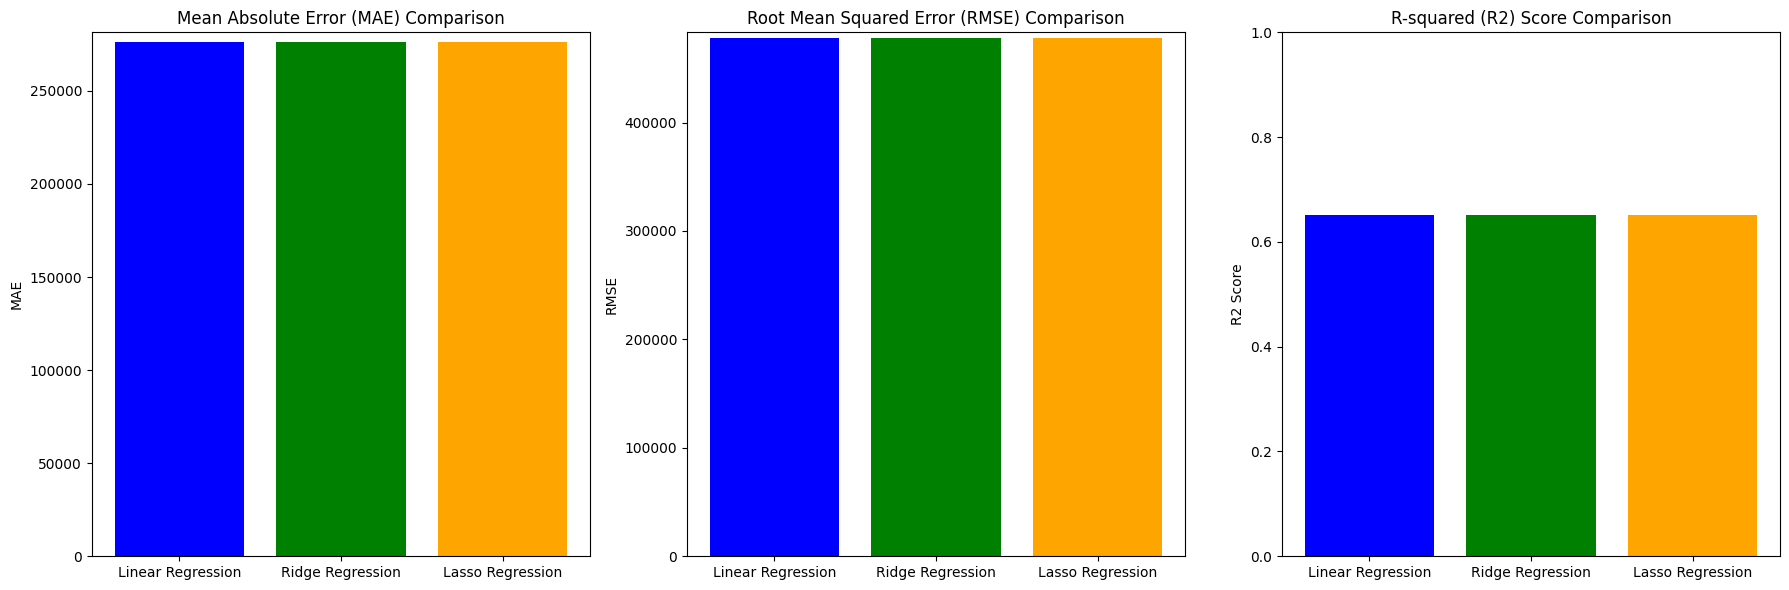

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already trained the Linear Regression, Ridge Regression, and Lasso Regression models
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate MAE, RMSE, and R2 for each model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Create lists to store evaluation metrics for different models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mae_scores = [linear_mae, ridge_mae, lasso_mae]
rmse_scores = [linear_rmse, ridge_rmse, lasso_rmse]
r2_scores = [linear_r2, ridge_r2, lasso_r2]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot MAE comparison
axes[0].bar(models, mae_scores, color=['blue', 'green', 'orange'])
axes[0].set_title('Mean Absolute Error (MAE) Comparison')
axes[0].set_ylabel('MAE')
axes[0].set_ylim(0, max(mae_scores) + 5000)

# Plot RMSE comparison
axes[1].bar(models, rmse_scores, color=['blue', 'green', 'orange'])
axes[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1].set_ylabel('RMSE')
axes[1].set_ylim(0, max(rmse_scores) + 5000)

# Plot R2 score comparison
axes[2].bar(models, r2_scores, color=['blue', 'green', 'orange'])
axes[2].set_title('R-squared (R2) Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].set_ylim(0, 1)

# Show the plots
plt.tight_layout()
plt.show()


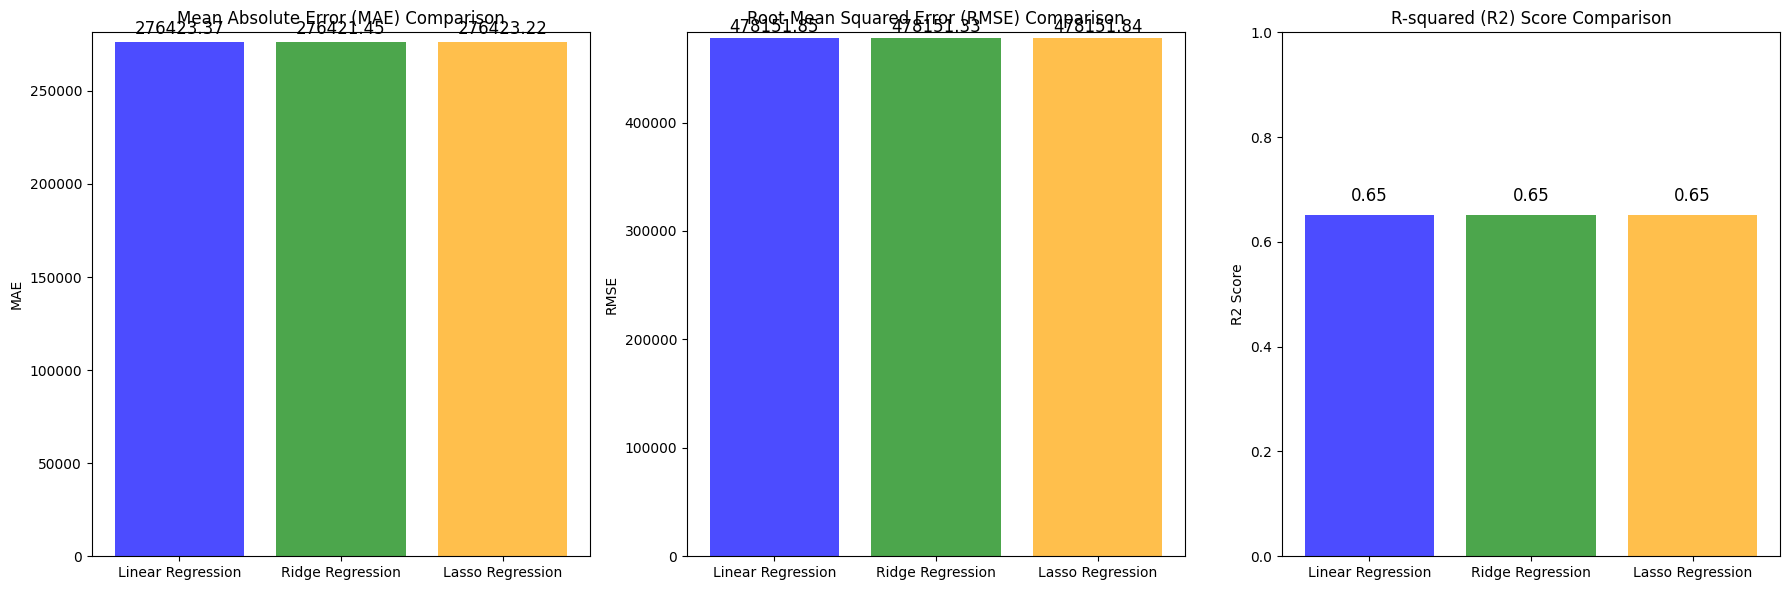

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate MAE, RMSE, and R2 for each model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Create lists to store evaluation metrics for different models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mae_scores = [linear_mae, ridge_mae, lasso_mae]
rmse_scores = [linear_rmse, ridge_rmse, lasso_rmse]
r2_scores = [linear_r2, ridge_r2, lasso_r2]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot MAE comparison
axes[0].bar(models, mae_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[0].set_title('Mean Absolute Error (MAE) Comparison')
axes[0].set_ylabel('MAE')
axes[0].set_ylim(0, max(mae_scores) + 5000)
for i, v in enumerate(mae_scores):
    axes[0].text(i, v + 2000, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Plot RMSE comparison
axes[1].bar(models, rmse_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1].set_ylabel('RMSE')
axes[1].set_ylim(0, max(rmse_scores) + 5000)
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 2000, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Plot R2 score comparison
axes[2].bar(models, r2_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[2].set_title('R-squared (R2) Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].set_ylim(0, 1)
for i, v in enumerate(r2_scores):
    axes[2].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()


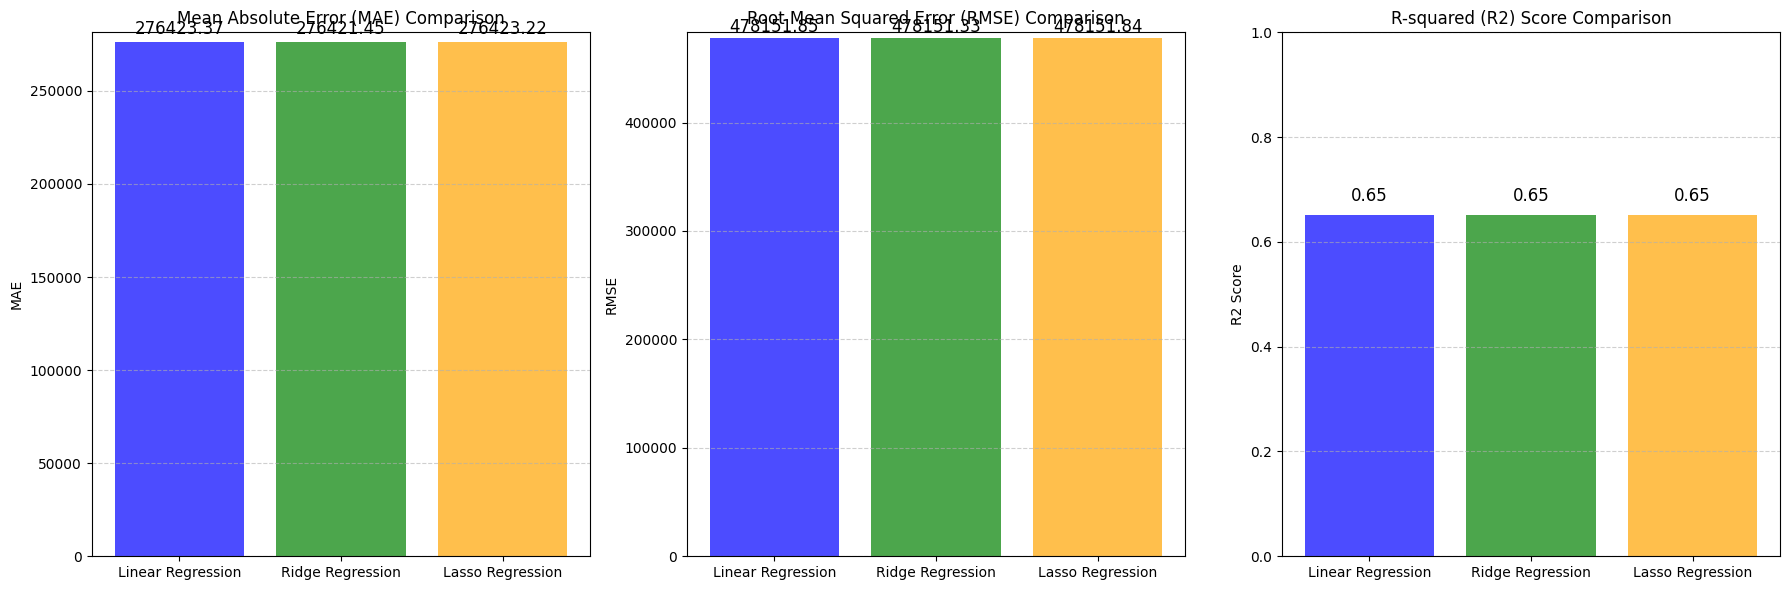

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already trained the Linear Regression, Ridge Regression, and Lasso Regression models
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate MAE, RMSE, and R2 for each model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Create lists to store evaluation metrics for different models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
mae_scores = [linear_mae, ridge_mae, lasso_mae]
rmse_scores = [linear_rmse, ridge_rmse, lasso_rmse]
r2_scores = [linear_r2, ridge_r2, lasso_r2]

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot MAE comparison
axes[0].bar(models, mae_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[0].set_title('Mean Absolute Error (MAE) Comparison')
axes[0].set_ylabel('MAE')
axes[0].set_ylim(0, max(mae_scores) + 5000)
for i, v in enumerate(mae_scores):
    axes[0].text(i, v + 2000, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Plot RMSE comparison
axes[1].bar(models, rmse_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1].set_ylabel('RMSE')
axes[1].set_ylim(0, max(rmse_scores) + 5000)
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 2000, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Plot R2 score comparison
axes[2].bar(models, r2_scores, color=['blue', 'green', 'orange'], alpha=0.7)
axes[2].set_title('R-squared (R2) Score Comparison')
axes[2].set_ylabel('R2 Score')
axes[2].set_ylim(0, 1)
for i, v in enumerate(r2_scores):
    axes[2].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

# Add grid lines
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plots
plt.tight_layout()
plt.show()


In [20]:
# Time for feature engineering

In [21]:
import pandas as pd
import re

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/drive/MyDrive/timepass/Car details v3.csv')

# Function to clean and extract numeric values from a string
def extract_numeric(text):
    if isinstance(text, str):
        try:
            # Extract numeric values from the string
            numeric_value = float(re.findall(r'\d+\.\d+|\d+', text)[0])
            return numeric_value
        except (ValueError, IndexError):
            pass
    return None

# Apply the function to the 'mileage', 'engine', 'max_power', and 'torque' columns
data['mileage'] = data['mileage'].apply(extract_numeric)
data['engine'] = data['engine'].apply(extract_numeric)
data['max_power'] = data['max_power'].apply(extract_numeric)
data['torque'] = data['torque'].apply(extract_numeric)

# Feature Engineering
# Calculate car age
data['car_age'] = pd.to_datetime('now').year - data['year']

# Encoding categorical variables
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission'])
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
data['owner'] = data['owner'].map(owner_mapping)

# Additional feature engineering ideas can be added here...

# Print the resulting dataset with engineered features
print(data.head())


                           name  year  selling_price  km_driven  owner  \
0        Maruti Swift Dzire VDI  2014         450000     145500    1.0   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000    2.0   
2      Honda City 2017-2020 EXi  2006         158000     140000    3.0   
3     Hyundai i20 Sportz Diesel  2010         225000     127000    1.0   
4        Maruti Swift VXI BSIII  2007         130000     120000    1.0   

   mileage  engine  max_power  torque  seats  car_age  fuel_CNG  fuel_Diesel  \
0    23.40  1248.0      74.00   190.0    5.0        9         0            1   
1    21.14  1498.0     103.52   250.0    5.0        9         0            1   
2    17.70  1497.0      78.00    12.7    5.0       17         0            0   
3    23.00  1396.0      90.00    22.4    5.0       13         0            1   
4    16.10  1298.0      88.20    11.5    5.0       16         0            0   

   fuel_LPG  fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0 

<ipython-input-21-ca87d991a18d>:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  data['car_age'] = pd.to_datetime('now').year - data['year']


In [22]:

# Save the data to an Excel file
data.to_excel('/content/drive/MyDrive/timepass/CarDataWithFeatures.xlsx', index=False)

print("Data with engineered features saved to 'CarDataWithFeatures.xlsx'")


Data with engineered features saved to 'CarDataWithFeatures.xlsx'


In [23]:
'''
Certainly, feature engineering is an essential step to improve model performance.

1. **Age of the Car:** Create a new feature 'car_age' by subtracting the 'year' of manufacture from the current year. This feature can capture how old the car is, which can influence its price.

2. **Fuel Type Encoding:** Convert the 'fuel' feature into numeric values using one-hot encoding or label encoding. Different fuel types may have different price ranges.

3. **Seller Type Encoding:** Similar to 'fuel,' convert the 'seller_type' feature into numeric values using one-hot encoding or label encoding. Different seller types may impact pricing.

4. **Transmission Encoding:** Encode the 'transmission' feature into numeric values (e.g., 0 for Manual and 1 for Automatic) to account for the impact of transmission type on price.

5. **Owner Encoding:** Encode the 'owner' feature into numeric values based on ownership history. For example, 'First Owner' can be encoded as 1, 'Second Owner' as 2, and so on.

6. **Mileage:** Extract the numeric part of the 'mileage' feature and convert it to a floating-point number. Higher mileage may lead to a lower selling price.

7. **Engine:** Extract the numeric part of the 'engine' feature and convert it to an integer or floating-point number. Engine size can affect price.

8. **Max Power:** Extract the numeric part of the 'max_power' feature and convert it to a floating-point number. Higher power output may lead to a higher price.

9. **Torque:** Extract the numeric part of the 'torque' feature and convert it to a floating-point number. Higher torque may lead to a higher price.

10. **Mileage per Year:** Calculate 'mileage_per_year' by dividing mileage by the age of the car. This can provide insights into how efficiently the car has been driven.

11. **Engine Power per Unit Weight:** Calculate 'power_to_weight_ratio' by dividing 'max_power' by 'engine' size. This can help account for the power-to-weight ratio of the car.

12. **Categorical Interactions:** Create interaction features between certain categorical variables. For example, the combination of 'fuel' and 'transmission' may affect price differently.

13. **Binning:** Bin certain continuous features like 'mileage,' 'engine,' and 'max_power' into ranges to capture nonlinear relationships.

14. **Polynomial Features:** Generate polynomial features for certain numeric features to capture nonlinearities.

15. **Feature Scaling:** Standardize or normalize numeric features to ensure that they have the same scale.


'''

"\nCertainly, feature engineering is an essential step to improve model performance.\n\n1. **Age of the Car:** Create a new feature 'car_age' by subtracting the 'year' of manufacture from the current year. This feature can capture how old the car is, which can influence its price.\n\n2. **Fuel Type Encoding:** Convert the 'fuel' feature into numeric values using one-hot encoding or label encoding. Different fuel types may have different price ranges.\n\n3. **Seller Type Encoding:** Similar to 'fuel,' convert the 'seller_type' feature into numeric values using one-hot encoding or label encoding. Different seller types may impact pricing.\n\n4. **Transmission Encoding:** Encode the 'transmission' feature into numeric values (e.g., 0 for Manual and 1 for Automatic) to account for the impact of transmission type on price.\n\n5. **Owner Encoding:** Encode the 'owner' feature into numeric values based on ownership history. For example, 'First Owner' can be encoded as 1, 'Second Owner' as 2, 